In [ ]:
!pip install yfinance
import pandas as pd 
import yfinance as yf # import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

     |████████████████████████████████| 5.5MB 5.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=14db6b6dad37f024c0a956bd6df682c8124e8c4042e9feb2d12d215279806036
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/NSE'

/content/gdrive/MyDrive/NSE


In [ ]:
NSE=pd.read_csv('NSE STOCKS.csv')

In [ ]:
NSE['NSE1']=NSE['NSE'].str.replace('.NS','')

In [ ]:
NSE['NSE1']='NSE/' + NSE['NSE1']

In [ ]:
KIRLOSENG = yf.download(, 
                       start='2015-01-01', 
                       end='2021-03-03',
                       progress=False)
KIRLOSENG.dropna(inplace=True)


1 Failed download:
- 21STCENMG.NS: No data found, symbol may be delisted


In [ ]:
p75,p50,p25 = np.percentile(KIRLOSENG['Adj Close'], [75 ,50,25])
iqr = p75-p25
print('Q1',p25)
print("IQR",iqr)
print('Q2',p50)
print('Q3',p75)
print('Max',KIRLOSENG['Adj Close'].max())
print('Mean',KIRLOSENG['Adj Close'].mean())
print('Today',KIRLOSENG['Adj Close'][-1])
print('std',KIRLOSENG['Adj Close'].std())

Q1 161.73153686523438
IQR 135.3317413330078
Q2 231.81085205078125
Q3 297.0632781982422
Max 381.65472412109375
Mean 225.93597775509483
Today 162.3000030517578
std 79.43152006999296


In [ ]:
def stock_selector(x,start,end):
  KIRLOSENG = yf.download(x, 
                        start=start, 
                        end=end,
                        progress=False)
  KIRLOSENG.dropna(inplace=True)
  p75,p50,p25 = np.percentile(KIRLOSENG['Adj Close'], [75 ,50,25])
  iqr = p75-p25
  #print('25% times:',round(p25,2),', 50% times:',round(p50,2),', 75% times:',round(p75,2))
  print('Min:',round(KIRLOSENG['Adj Close'].min(),2), ', Average:',round(KIRLOSENG['Adj Close'].mean(),2), ', Max:',round(KIRLOSENG['Adj Close'].max(),2))
  print('Today:',round(KIRLOSENG['Adj Close'][-1],2))
  print('Deviation:',round(KIRLOSENG['Adj Close'].std(),2))
  plt.figure(figsize=(20,8))
  plt.title(x)
  plt.ylabel('Price')
  plt.xlabel('Year')
  plt.plot(KIRLOSENG['Adj Close'])
  plt.show()

Min: 2.94 , Average: 21.78 , Max: 93.33
Today: 32.55
Deviation: 21.7


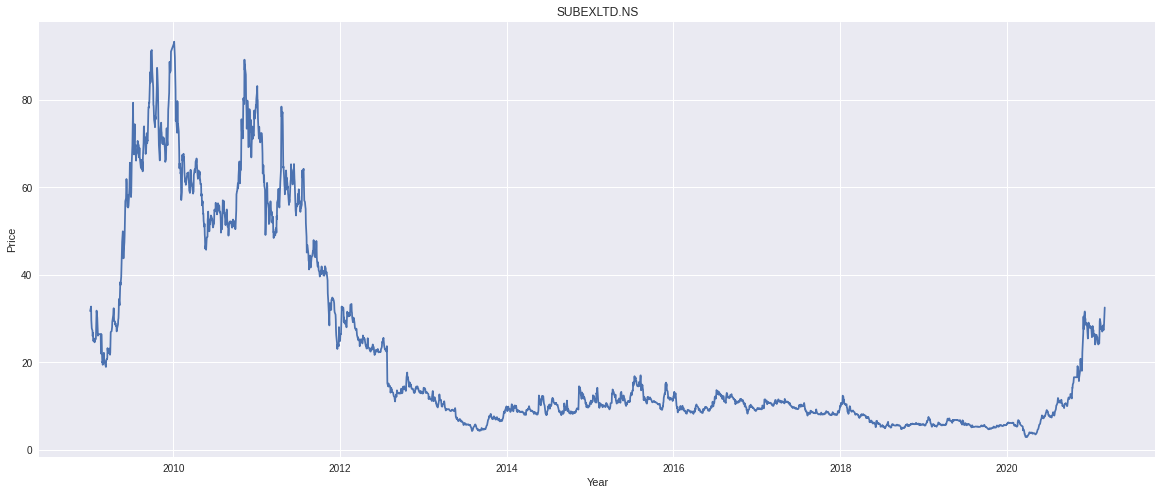

In [ ]:
stock_selector('SUBEXLTD.NS','2009-01-01','2021-03-07')

In [ ]:
IRCTC = yf.download('IRCTC.NS', 
                       start='2021-01-12', 
                       end='2021-03-11',
                       progress=False, interval= "15m")
IRCTC.dropna(inplace=True)

In [ ]:
IRCTC.reset_index(inplace=True)

In [ ]:
IRCTC.head(1)

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-01-12 09:15:00+05:30,1460.650024,1472.949951,1454.050049,1469.849976,1469.849976,64246


In [ ]:
IRCTC['Datetime']=IRCTC['Datetime'].astype('str')
df=IRCTC['Datetime'].str.split(' ',expand=True)
IRCTC['Date']=df[0]
IRCTC['Time']=df[1]

In [ ]:
for i in IRCTC['Date']:
  if i=='2021-02-24':
    IRCTC.drop(IRCTC[IRCTC['Date'] == i].index, inplace = True) 

In [ ]:
IRCTC.to_csv('IRCTC.csv',index=False)

In [ ]:
files.download('IRCTC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dupli=IRCTC.copy()

In [ ]:
for i in dupli['Time']:
  if i=='10:00:00+05:30' or i=='15:00:00+05:30':
    pass
  else:
    dupli.drop(dupli[dupli['Time'] == i].index, inplace = True) 

In [ ]:
dupli.head(2)

,Datetime,Open,High,Low,Close,Adj Close,Volume,Date,Time
3,2021-01-12 10:00:00+05:30,1465.150024,1467.099976,1462.650024,1465.000000,1465.000000,19028,2021-01-12,10:00:00+05:30
23,2021-01-12 15:00:00+05:30,1481.150024,1482.099976,1474.500000,1476.349976,1476.349976,103323,2021-01-12,15:00:00+05:30


In [ ]:
#dupli=dupli.drop(3,axis=0)

In [ ]:
dupli.reset_index(inplace=True)

In [ ]:
dupli['Buy Date']= dupli['Date'] +' '+dupli['Time']

In [ ]:
dupli=dupli.drop(['index','Datetime','High','Low','Close','Adj Close','Volume','Date','Time'],axis=1)

In [ ]:
dupli=dupli.rename(columns={'Open':'Buy Price'})

In [ ]:
dupli

,Buy Price,Buy Date
0,1465.150024,2021-01-12 10:00:00+05:30
1,1481.150024,2021-01-12 15:00:00+05:30
2,1484.949951,2021-01-13 10:00:00+05:30
3,1462.000000,2021-01-13 15:00:00+05:30
4,1463.800049,2021-01-14 10:00:00+05:30
...,...,...
75,2005.449951,2021-03-08 15:00:00+05:30
76,2034.699951,2021-03-09 10:00:00+05:30
77,2029.599976,2021-03-09 15:00:00+05:30
78,2032.099976,2021-03-10 10:00:00+05:30


In [ ]:
dupli['Sell Price']=dupli['Buy Price'].shift(-1)

In [ ]:
dupli['Sell Date']=dupli['Buy Date'].shift(-1)

In [ ]:
dupli=dupli.dropna()

In [ ]:
dupli.head(20)

,Buy Price,Buy Date,Sell Price,Sell Date
0,1465.150024,2021-01-12 10:00:00+05:30,1481.150024,2021-01-12 15:00:00+05:30
1,1481.150024,2021-01-12 15:00:00+05:30,1484.949951,2021-01-13 10:00:00+05:30
2,1484.949951,2021-01-13 10:00:00+05:30,1462.000000,2021-01-13 15:00:00+05:30
3,1462.000000,2021-01-13 15:00:00+05:30,1463.800049,2021-01-14 10:00:00+05:30
4,1463.800049,2021-01-14 10:00:00+05:30,1463.150024,2021-01-14 15:00:00+05:30
5,1463.150024,2021-01-14 15:00:00+05:30,1457.000000,2021-01-15 10:00:00+05:30
6,1457.000000,2021-01-15 10:00:00+05:30,1442.699951,2021-01-15 15:00:00+05:30
7,1442.699951,2021-01-15 15:00:00+05:30,1448.199951,2021-01-18 10:00:00+05:30
8,1448.199951,2021-01-18 10:00:00+05:30,1428.000000,2021-01-18 15:00:00+05:30
9,1428.000000,2021-01-18 15:00:00+05:30,1440.300049,2021-01-19 10:00:00+05:30


In [ ]:
dupli = dupli[np.arange(len(dupli)) % 2 == 0]

In [ ]:
dupli.reset_index(inplace=True)

In [ ]:
dupli=dupli.drop('index',axis=1)

In [ ]:
dupli

,Buy Price,Buy Date,Sell Price,Sell Date
0,1465.150024,2021-01-12 10:00:00+05:30,1481.150024,2021-01-12 15:00:00+05:30
1,1484.949951,2021-01-13 10:00:00+05:30,1462.000000,2021-01-13 15:00:00+05:30
2,1463.800049,2021-01-14 10:00:00+05:30,1463.150024,2021-01-14 15:00:00+05:30
3,1457.000000,2021-01-15 10:00:00+05:30,1442.699951,2021-01-15 15:00:00+05:30
4,1448.199951,2021-01-18 10:00:00+05:30,1428.000000,2021-01-18 15:00:00+05:30
5,1440.300049,2021-01-19 10:00:00+05:30,1439.000000,2021-01-19 15:00:00+05:30
6,1443.000000,2021-01-20 10:00:00+05:30,1450.699951,2021-01-20 15:00:00+05:30
7,1452.500000,2021-01-21 10:00:00+05:30,1457.000000,2021-01-21 15:00:00+05:30
8,1457.099976,2021-01-22 10:00:00+05:30,1436.449951,2021-01-22 15:00:00+05:30
9,1430.000000,2021-01-25 10:00:00+05:30,1425.500000,2021-01-25 15:00:00+05:30


In [ ]:
dupli['Profit/Loss']=((dupli['Sell Price'] - dupli['Buy Price']) * 30) - 130

In [ ]:
dupli['Profit/Loss'].sum()

-2729.50439453125

In [ ]:
dupli.to_csv('IRCTC_BTST.csv',index=False)

In [ ]:
#from google.colab import files
files.download("IRCTC_BTST.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

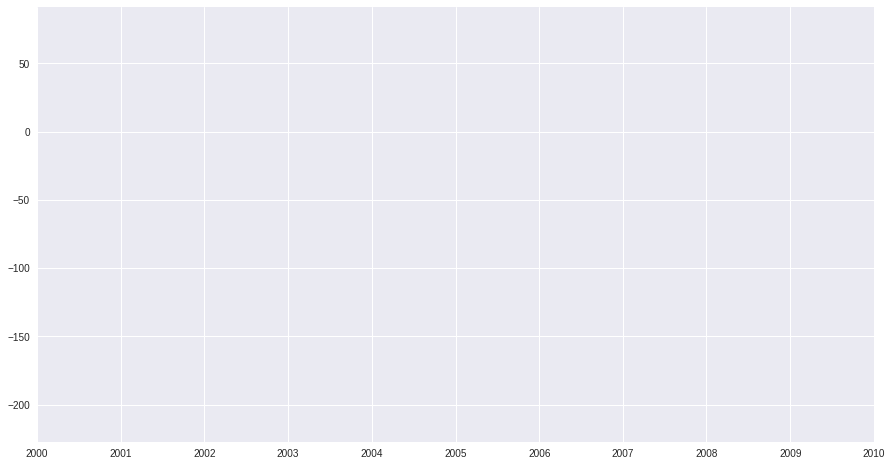

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(IRCTC['Points Earned'],)